In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
import joblib
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import confusion_matrix

In [28]:
df = pd.read_csv("/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
print(df.shape)
columns_to_drop = ["Flow ID", " Source IP", " Source Port", " Destination IP",
                   " Destination Port", " Protocol", " Timestamp", " Fwd Header Length",
                   " Bwd Header Length", " Fwd Packet Length Mean", " Bwd Packet Length Mean",
                   " Bwd Packet Length Std", "Fwd Packets/s", " Bwd Packets/s", " Fwd IAT Mean",
                   " Fwd IAT Std", " Bwd IAT Mean", " Bwd IAT Std", "Fwd PSH Flags", " Bwd PSH Flags",
                   " Fwd URG Flags", " Bwd URG Flags", "Fwd Packets/s", " Bwd Packets/s",
                   "Bwd Packet Length Max", " Bwd Packet Length Std", "Fwd Avg Bytes/Bulk",
                   " Fwd Avg Packets/Bulk", " Fwd Avg Bulk Rate", " Bwd Avg Bytes/Bulk",
                   " Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", "Subflow Fwd Packets",
                   " Subflow Bwd Packets", "Init_Win_bytes_forward", " Init_Win_bytes_backward",
                   " act_data_pkt_fwd", " min_seg_size_forward"]
print(len(columns_to_drop))
df.drop(columns_to_drop, axis=1, inplace=True)

(225745, 85)
38


In [29]:
# df.to_csv("P1_real.csv", index=False)

In [30]:
df.shape

(225745, 50)

In [31]:
df.isnull().sum()

,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
Total Length of Bwd Packets,0
Fwd Packet Length Max,0
Fwd Packet Length Min,0
Fwd Packet Length Std,0
Bwd Packet Length Min,0
Flow Bytes/s,4


In [32]:
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Min,Flow Bytes/s,...,Subflow Bwd Bytes,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3,2,0,12,0,6,6,0.0,0,4.000000e+06,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,109,1,1,6,6,6,6,0.0,6,1.100917e+05,...,6,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,52,1,1,6,6,6,6,0.0,6,2.307692e+05,...,6,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,34,1,1,6,6,6,6,0.0,6,3.529412e+05,...,6,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,3,2,0,12,0,6,6,0.0,0,4.000000e+06,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [33]:
X = df.drop(" Label", axis=1)
y = df[" Label"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((151249, 49), (151249,), (74496, 49), (74496,))

In [36]:
if np.any(np.isinf(X_train)) or np.any(np.isinf(X_test)):
    print("Infinity values found in the dataset.")
    X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

if np.any(np.isnan(X_train)) or np.any(np.isnan(X_test)):
    print("NaN values found in the dataset.")
    X_train.fillna(X_train.mean(), inplace=True)
    X_test.fillna(X_test.mean(), inplace=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# X_train_scaled = X_train_scaled[:10000]
# y_train = y_train.iloc[:10000]

Infinity values found in the dataset.
NaN values found in the dataset.


In [37]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((151249, 49), (74496, 49), (151249,), (74496,))

### **Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     32269
        DDoS       1.00      1.00      1.00     42227

    accuracy                           1.00     74496
   macro avg       1.00      1.00      1.00     74496
weighted avg       1.00      1.00      1.00     74496

0.9984428694158075
Model saved successfully.


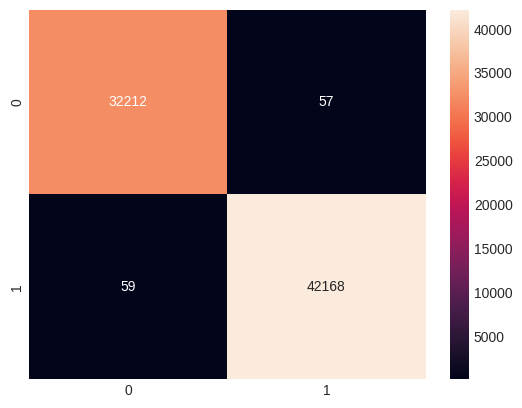

In [38]:
model_LR = LogisticRegression()
model_LR.fit(X_train_scaled, y_train)

y_pred = model_LR.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

accuracy_LR = accuracy_score(y_test, y_pred)
accuracy_LR_str = f"{accuracy_LR:.4f}".replace(".", "")

filename = f"Phase1_LR_{accuracy_LR_str}.pkl"

print(accuracy_LR)

try:
    with open(filename, "wb") as file:
        joblib.dump(model_LR, file)
    print("Model saved successfully.")
except PermissionError as e:
    print(f"Permission error occurred while saving the model: {e}")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")

cm_LR = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_LR, annot=True, fmt="d")
plt.show()

### **Decision Tree**

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     32269
        DDoS       1.00      1.00      1.00     42227

    accuracy                           1.00     74496
   macro avg       1.00      1.00      1.00     74496
weighted avg       1.00      1.00      1.00     74496

0.9996509879725086
Model saved successfully.


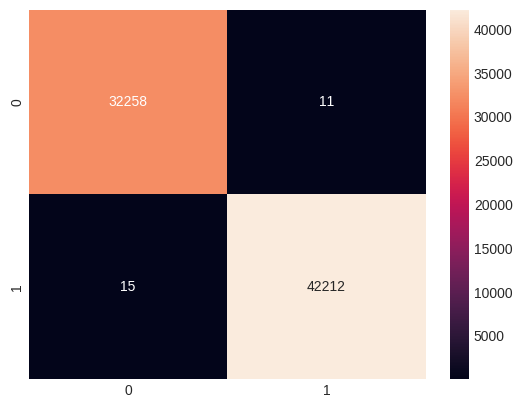

In [39]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_scaled, y_train)

y_pred = model_DT.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

accuracy_DT = accuracy_score(y_test, y_pred)
accuracy_DT_str = f"{accuracy_DT:.4f}".replace(".", "")

filename = f"Phase1_DT_{accuracy_DT_str}.pkl"

print(accuracy_DT)

try:
    with open(filename, "wb") as file:
        joblib.dump(model_DT, file)
    print("Model saved successfully.")
except PermissionError as e:
    print(f"Permission error occurred while saving the model: {e}")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")

cm_DT = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_DT, annot=True, fmt="d")
plt.show()

### **SVM**

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     32269
        DDoS       1.00      1.00      1.00     42227

    accuracy                           1.00     74496
   macro avg       1.00      1.00      1.00     74496
weighted avg       1.00      1.00      1.00     74496

0.9984428694158075
Model saved successfully.


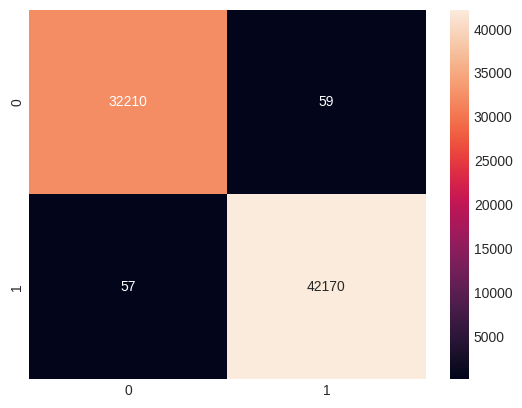

In [40]:
model_SVM = SVC()
model_SVM.fit(X_train_scaled, y_train)

y_pred = model_SVM.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

accuracy_SVM = accuracy_score(y_test, y_pred)
accuracy_SVM_str = f"{accuracy_SVM:.4f}".replace(".", "")

filename = f"Phase1_SVM_{accuracy_SVM_str}.pkl"

print(accuracy_SVM)

try:
    with open(filename, "wb") as file:
        joblib.dump(model_SVM, file)
    print("Model saved successfully.")
except PermissionError as e:
    print(f"Permission error occurred while saving the model: {e}")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")

cm_SVM = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_SVM, annot=True, fmt="d")
plt.show()

### **Random Forest**

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     32269
        DDoS       1.00      1.00      1.00     42227

    accuracy                           1.00     74496
   macro avg       1.00      1.00      1.00     74496
weighted avg       1.00      1.00      1.00     74496

0.9996778350515464
Model saved successfully.


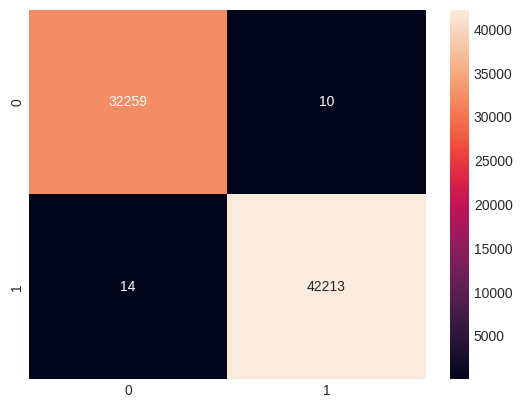

In [41]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train_scaled, y_train)

y_pred = model_RF.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

accuracy_RF = accuracy_score(y_test, y_pred)
accuracy_RF_str = f"{accuracy_RF:.4f}".replace(".", "")

filename = f"Phase1_RF_{accuracy_RF_str}.pkl"

print(accuracy_RF)

try:
    with open(filename, "wb") as file:
        joblib.dump(model_RF, file)
    print("Model saved successfully.")
except PermissionError as e:
    print(f"Permission error occurred while saving the model: {e}")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")

cm_RF = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_RF, annot=True, fmt="d")
plt.show()

### **KNN**

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     32269
        DDoS       1.00      1.00      1.00     42227

    accuracy                           1.00     74496
   macro avg       1.00      1.00      1.00     74496
weighted avg       1.00      1.00      1.00     74496

0.9993690936426117
Model saved successfully.


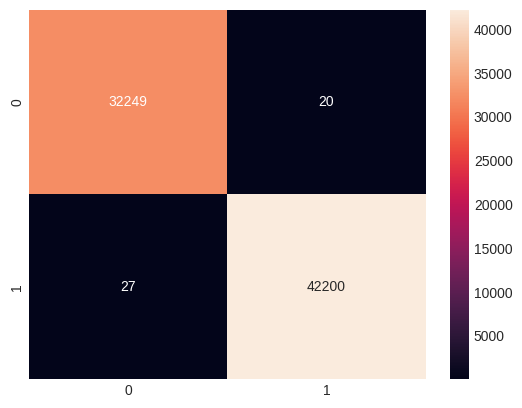

In [42]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_scaled, y_train)

y_pred = model_KNN.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

accuracy_KNN = accuracy_score(y_test, y_pred)
accuracy_KNN_str = f"{accuracy_KNN:.4f}".replace(".", "")

filename = f"Phase1_KNN_{accuracy_KNN_str}.pkl"

print(accuracy_KNN)

try:
    with open(filename, "wb") as file:
        joblib.dump(model_KNN, file)
    print("Model saved successfully.")
except PermissionError as e:
    print(f"Permission error occurred while saving the model: {e}")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")

cm_KNN = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_KNN, annot=True, fmt="d")
plt.show()

In [ ]:
# random_state = 42
# classifier = [DecisionTreeClassifier(random_state = random_state),
#              SVC(random_state = random_state),
#              RandomForestClassifier(random_state = random_state),
#              LogisticRegression(random_state = random_state),
#              KNeighborsClassifier()]

# dt_param_grid = {"min_samples_split" : range(10,500,20),
#                 "max_depth": range(1,20,2)}

# svc_param_grid = {"kernel" : ["rbf"],
#                  "gamma": [0.001, 0.01, 0.1, 1],
#                  "C": [1,10,50,100,200,300,1000]}

# rf_param_grid = {"max_features": [1,3,10],
#                 "min_samples_split":[2,3,10],
#                 "min_samples_leaf":[1,3,10],
#                 "bootstrap":[False],
#                 "n_estimators":[100,300],
#                 "criterion":["gini"]}

# logreg_param_grid = {"C":np.logspace(-3,3,7),
#                     "penalty": ["l2"]}

# knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
#                  "weights": ["uniform","distance"],
#                  "metric":["euclidean","manhattan"]}
# classifier_param = [dt_param_grid,
#                    svc_param_grid,
#                    rf_param_grid,
#                    logreg_param_grid,
#                    knn_param_grid]
# cv_result = []
# best_estimators = []

In [ ]:
# cv_result = []
# best_estimators = []
# for i in range(len(classifier)):
#     clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
#     clf.fit(X_train_scaled,y_train)
#     cv_result.append(clf.best_score_)
#     best_estimators.append(clf.best_estimator_)
#     print(cv_result[i])

In [ ]:
# cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
#        "LogisticRegression",
#        "KNeighborsClassifier"]})

# g = sns.barplot(x="Cross Validation Means",y= "ML Models", data=cv_results)
# g.set_xlabel("Mean Accuracy")
# g.set_title("Cross Validation Scores")

In [ ]:
# votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
#                                         ("rfc",best_estimators[2]),
#                                         ("knn",best_estimators[4])],
#                                         voting = "soft", n_jobs = -1)
# votingC = votingC.fit(X_train_scaled, y_train)

# print("Accuracy Score: ",accuracy_score(votingC.predict(X_test_scaled), y_test))

In [ ]:
# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, votingC.predict(X_test_scaled))
# sns.heatmap(cm, annot=True, fmt="d")
# plt.savefig("ConfusionMatrix.png")
# plt.show()

In [ ]:
# df = pd.DataFrame(y_test)
# df["Predicted Label"] = votingC.predict(X_test_scaled)
# df = df.sort_index(axis=0)
# df.columns = ["Actual Label", "Predicted Label"]
# df.to_csv("PredictedLabels.csv")

In [ ]:
# import pickle
# try:
#     with open("/content/DDoS_Detection_Model_Core_Useful/DDoS_Detection_Model_Core_Useful_30_Oct_2024.pkl", "wb") as ddos_model_file_30_Oct_2024:
#         pickle.dump(votingC, ddos_model_file_30_Oct_2024)
#     print("Model saved successfully.")
# except PermissionError as e:
#     print(f"Permission error occurred while saving the model: {e}")
# except Exception as e:
#     print(f"An error occurred while saving the model: {e}")

# try:
#     with open("/content/DDoS_Detection_Model_Core_Useful/DDoS_Detection_Model_Core_Useful_30_Oct_2024.pkl", "rb") as ddos_model_file_30_Oct_2024:
#         model = pickle.load(ddos_model_file_30_Oct_2024)
#     print("Model loaded successfully.")
# except PermissionError as e:
#     print(f"Permission error occurred while loading the model: {e}")
# except Exception as e:
#     print(f"An error occurred while loading the model: {e}")

In [ ]:
# print("Accuracy Score: ",accuracy_score(model.predict(X_test_scaled), y_test))

## **Inferencing**

In [43]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [53]:
# Load the model
model_RF = joblib.load("Phase1_RF_09997.pkl")

# Load new data
p2_akm = pd.read_csv("p2_synthetic.csv")

In [54]:
# Separate features and labels
X_new = p2_akm.drop(columns=[' Label'])  # Adjust 'label' to the actual column name if different
y_new = p2_akm[' Label']

In [47]:
# Scale the features if scaling was used during training
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)  # Ensure scaler is fit with the same parameters as used during training

In [55]:
# Make predictions
y_pred_new = model_RF.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [56]:
# Calculate inference accuracy
inference_accuracy = accuracy_score(y_new, y_pred_new)
print(f"Inference Accuracy: {inference_accuracy:.4f}")

Inference Accuracy: 0.5000


In [50]:
y_pred_new

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [51]:
X_new_scaled

array([[-0.11366276, -1.00437877, -0.96837746, ...,  0.01403313,
         0.82233333,  0.8890263 ],
       [-0.0447077 , -1.00437877, -0.96515992, ...,  0.01403313,
         0.91293708,  0.98369279],
       [-0.10412795, -0.99918896, -0.96676869, ...,  0.01403313,
         0.82233333,  0.8890263 ],
       ...,
       [-1.46127191,  0.99992591,  1.02673714, ...,  1.22215962,
        -0.96889478, -0.9825241 ],
       [ 1.26731251,  0.9999261 ,  0.43526187, ..., -1.39794003,
        -0.96889705, -0.98252335],
       [-1.49703308,  0.9999261 ,  1.39208183, ...,  1.4260063 ,
        -0.96889563, -0.9825241 ]])

In [52]:
X_new

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Min,Flow Bytes/s,...,Subflow Fwd Bytes,Subflow Bwd Bytes,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,9.005601e+04,1.000000,0.002719,6.000000,0.000000,6.000000,0.000000,0.000000,0.000000,2.000000e+06,...,6.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
1,5.275584e+06,1.000000,0.013596,6.002229,0.067356,6.007192,0.024457,0.000000,6.000000,2.000001e+06,...,6.002229,0.067356,1.040736e+03,0.000000,1.040736e+03,1.040736e+03,5.108764e+06,0.0,5.108764e+06,5.108764e+06
2,8.070886e+05,1.025893,0.008158,10.310471,0.058375,11.250000,0.000000,3.714362,0.000000,2.002080e+06,...,10.310471,0.058375,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
3,6.154656e+04,1.000000,0.002719,6.020436,0.244728,6.065925,0.224185,0.000000,109.000000,2.000385e+06,...,6.020436,0.244728,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
4,1.820316e+02,1.005179,0.005438,6.023037,0.929517,6.037158,0.126359,0.000000,207.000000,2.381410e+06,...,6.023037,0.929517,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.009192e+08,10.999998,5.791968,73.999931,11465.040039,18.118132,3.069260,-14.140843,-1459.999268,3.464455e+08,...,-61.999947,-11612.990234,-5.000888e+06,0.999990,4.997777e+06,-5.000876e+06,1.009873e+08,-63678760.0,-1.009998e+08,-1.010000e+08
9996,-1.039415e+08,10.999995,7.710365,73.999931,-11612.349609,19.864346,-0.323132,-14.140932,-1459.998047,-3.469997e+08,...,-61.999924,-11612.976562,-5.000888e+06,0.999976,-5.000894e+06,-5.000884e+06,1.009904e+08,64299920.0,-1.009998e+08,-1.009999e+08
9997,-1.012523e+08,10.999993,6.747262,73.999870,-5570.268066,19.542356,1.544644,-14.141463,-1459.998657,-1.836435e+08,...,-61.999947,-11612.992188,-5.000888e+06,0.999958,-2.708930e+06,-5.000884e+06,1.009963e+08,55017004.0,-1.009998e+08,-1.009999e+08
9998,1.039416e+08,10.999994,4.747763,73.999985,11613.000000,15.680991,3.793813,-14.141662,-1459.999268,3.470000e+08,...,-61.999901,-11612.987305,-5.000891e+06,0.999988,5.000895e+06,-5.000878e+06,1.009961e+08,-64300000.0,-1.009999e+08,-1.009999e+08
